In [239]:
library(quantmod)
library(ggplot2)

# Download JPM data from Yahoo Finance
getSymbols("JPM", src = "yahoo", from = '2018-02-01', to = '2018-12-30', getSymbols.yahoo.warning=FALSE)

# Show first few rows from the dataset
head(JPM)

[1] "JPM"

           JPM.Open JPM.High JPM.Low JPM.Close JPM.Volume JPM.Adjusted
2018-02-01   115.77   116.99  115.48    116.87   13800600     113.9224
2018-02-02   116.49   116.92  114.09    114.28   16477300     111.3978
2018-02-05   113.00   114.59  103.98    108.80   30097600     106.0560
2018-02-06   106.85   112.48  106.61    112.11   33114800     109.2825
2018-02-07   111.55   114.45  111.15    112.87   21878300     110.0233
2018-02-08   113.11   113.11  107.84    107.88   27425800     105.1592

In [240]:
# Show summary statistics for the JPM dataset
summary(JPM)

     Index               JPM.Open         JPM.High         JPM.Low      
 Min.   :2018-02-01   Min.   : 92.69   Min.   : 94.22   Min.   : 91.11  
 1st Qu.:2018-04-25   1st Qu.:108.24   1st Qu.:109.29   1st Qu.:106.73  
 Median :2018-07-17   Median :111.17   Median :111.95   Median :109.89  
 Mean   :2018-07-15   Mean   :110.80   Mean   :111.80   Mean   :109.64  
 3rd Qu.:2018-10-05   3rd Qu.:114.59   3rd Qu.:115.24   3rd Qu.:113.67  
 Max.   :2018-12-28   Max.   :119.13   Max.   :119.33   Max.   :118.08  
   JPM.Close        JPM.Volume        JPM.Adjusted  
 Min.   : 92.14   Min.   : 6488400   Min.   : 91.4  
 1st Qu.:108.00   1st Qu.:11048700   1st Qu.:106.1  
 Median :110.99   Median :13948300   Median :109.0  
 Mean   :110.63   Mean   :15243736   Mean   :108.8  
 3rd Qu.:114.62   3rd Qu.:17963300   3rd Qu.:112.3  
 Max.   :118.77   Max.   :41313900   Max.   :116.9  

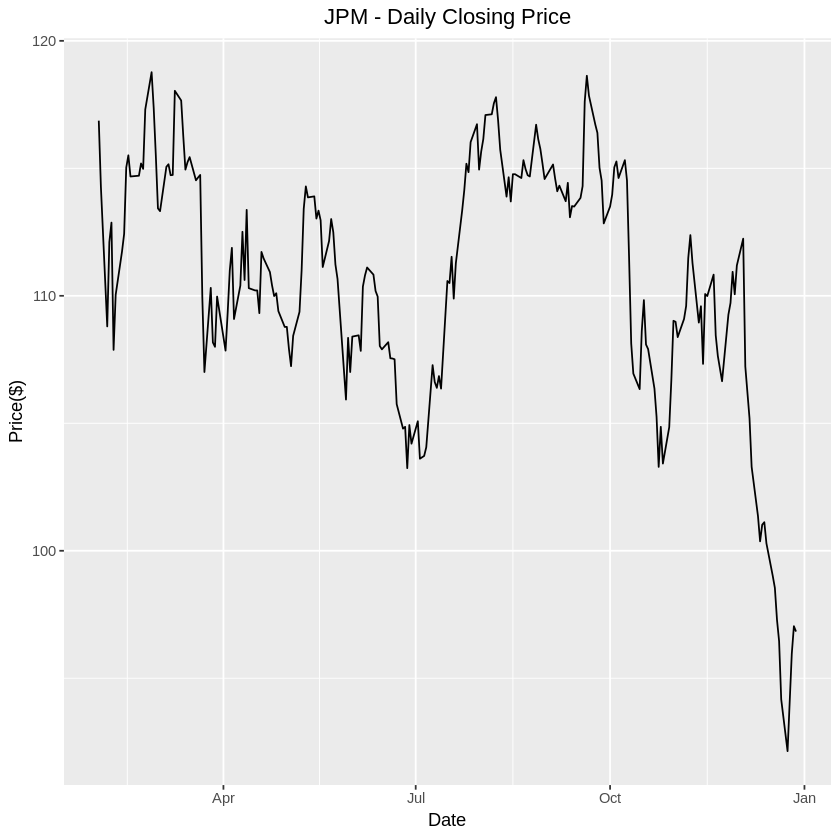

In [241]:
# Plot the daily closing price of JPM
ggplot(JPM, aes(Index)) + 
    geom_line(aes(y = JPM.Close)) + 
    ggtitle("JPM - Daily Closing Price") +
    labs(x = "Date", y = "Price($)") + 
    theme(plot.title = element_text(hjust = 0.5))

In [242]:
# Calculate mean of closing price
jpmMeanAdj = mean(JPM[,"JPM.Adjusted"])
sprintf("1.1. Average stock value: %s", jpmMeanAdj)

[1] "1.1. Average stock value: 108.786558755459"

In [243]:
# Calculate standard deviation of closing price
jpmVol = sd(JPM[,"JPM.Adjusted"])
sprintf("1.2. Stock Volatility: %s", jpmVol)

[1] "1.2. Stock Volatility: 4.63417113735034"

In [244]:
# Calculate arithmetic daily returns
jpmDailyRet = dailyReturn(JPM, type="arithmetic")
# Modify the from daily.returns to JPM.Returns
names(jpmDailyRet)[1] = "JPM.Returns"

# Calculate log daily returns
jpmLogRet = dailyReturn(JPM, type="log")
# Modify the from daily.returns to JPM.LogReturns
names(jpmLogRet)[1] = "JPM.LogReturns"

# Join both arithmatic and log returns with JPM xts
jpmWithReturns = merge(JPM, jpmDailyRet, join = "outer")
jpmWithReturns = merge(jpmWithReturns, jpmLogRet, join = "outer")

# Print first few rows of new dataset
head(jpmWithReturns)

           JPM.Open JPM.High JPM.Low JPM.Close JPM.Volume JPM.Adjusted
2018-02-01   115.77   116.99  115.48    116.87   13800600     113.9224
2018-02-02   116.49   116.92  114.09    114.28   16477300     111.3978
2018-02-05   113.00   114.59  103.98    108.80   30097600     106.0560
2018-02-06   106.85   112.48  106.61    112.11   33114800     109.2825
2018-02-07   111.55   114.45  111.15    112.87   21878300     110.0233
2018-02-08   113.11   113.11  107.84    107.88   27425800     105.1592
            JPM.Returns JPM.LogReturns
2018-02-01  0.009501650    0.009456793
2018-02-02 -0.022161410   -0.022410663
2018-02-05 -0.047952363   -0.049140207
2018-02-06  0.030422775    0.029969179
2018-02-07  0.006779074    0.006756199
2018-02-08 -0.044210205   -0.045217270

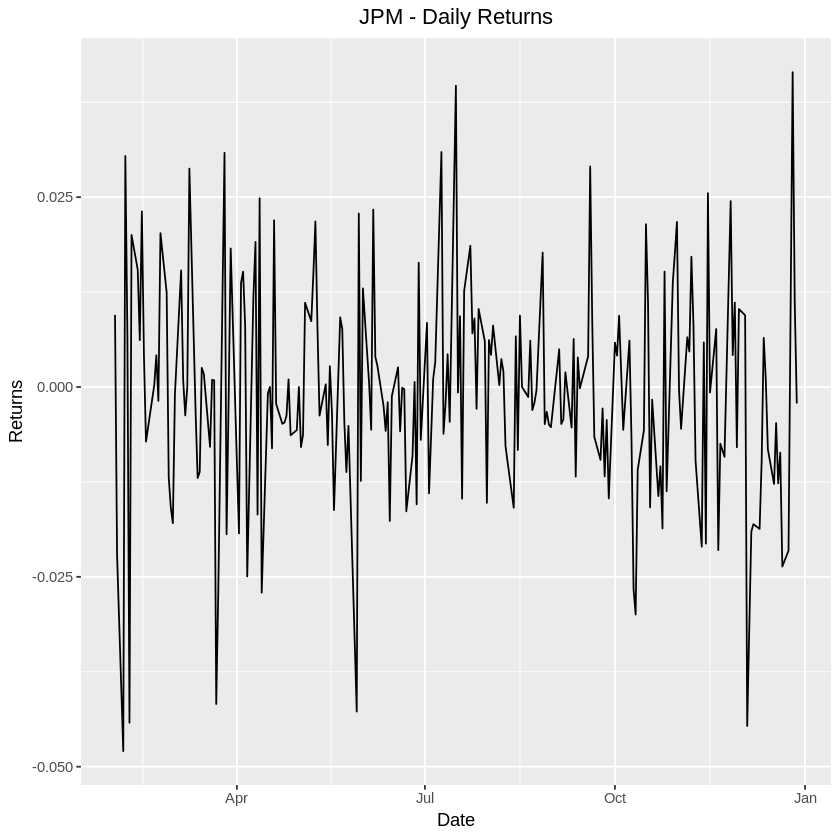

In [245]:
ggplot(jpmWithReturns, aes(Index)) + 
    geom_line(aes(y = JPM.Returns))+
    ggtitle("JPM - Daily Returns") +
    labs(x = "Date", y = "Returns") + 
    theme(plot.title = element_text(hjust = 0.5))

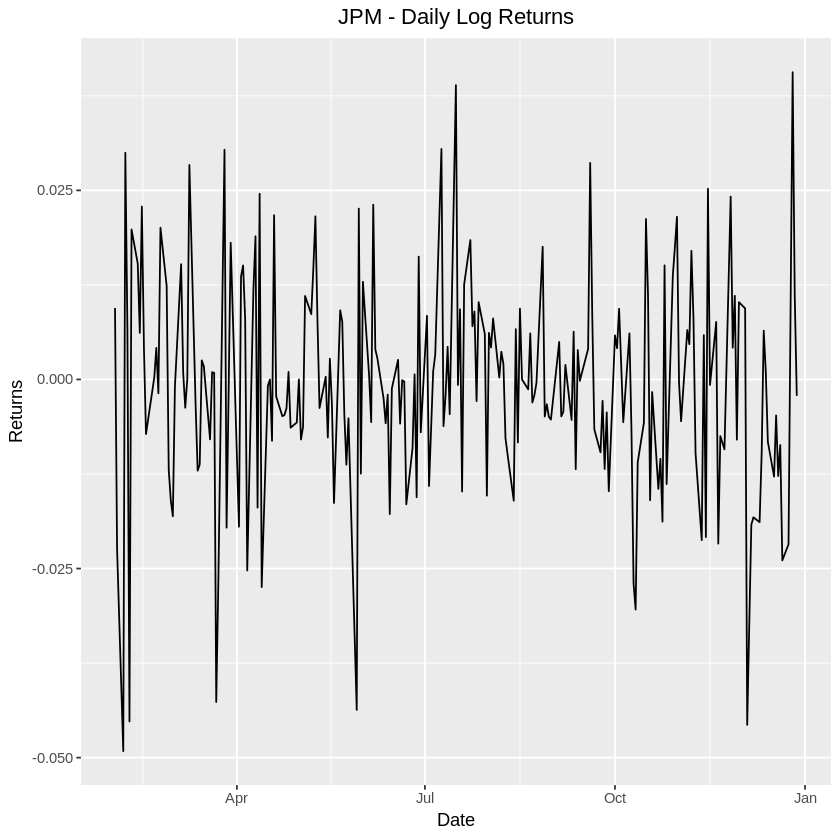

In [246]:
ggplot(jpmWithReturns, aes(Index)) + 
    geom_line(aes(y = JPM.LogReturns))+
    ggtitle("JPM - Daily Log Returns") +
    labs(x = "Date", y = "Returns") + 
    theme(plot.title = element_text(hjust = 0.5))